# Bitcoin Price Forecast Using RNN

We start with the imports we need.

In [1]:
import math
import numpy as np
import pandas as pd

from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib import pyplot as plt

/var/folders/26/x2snc4md15x1tj5_mzlnj2qm0000gn/T/ipykernel_20847/1311057494.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Then, we load the data from a CSV file.

In [2]:
df = pd.read_csv('BTC.csv')

Now, we get some insight into the data imported.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  4969 non-null   object 
 1   date    4969 non-null   object 
 2   open    4969 non-null   float64
 3   high    4969 non-null   float64
 4   low     4969 non-null   float64
 5   close   4969 non-null   float64
dtypes: float64(4), object(2)
memory usage: 233.0+ KB


It is clear that the columns of interest are `open`, `high`, `low` and `close`; a very important column, moreover, is `date`. The column `ticker` has no interst for us now.

Let's describe the `DataFrame`.

In [4]:
df.describe()

,open,high,low,close
count,4969.000000,4969.000000,4969.000000,4969.000000
mean,10467.520469,10729.255719,10185.582565,10478.199010
std,15351.652463,15729.945949,14934.180410,15362.245803
min,0.049510,0.049510,0.010000,0.049510
25%,225.290000,230.690000,220.360000,225.420000
50%,1507.770000,1572.890000,1485.010000,1516.760000
75%,13737.800000,14256.500000,13031.000000,13749.600000
max,67304.600000,68976.500000,66343.000000,67305.100000


It seems that there are no missing values: good. We can go on and start the data preparation.

In [5]:
close_df = df[['date', 'close']]
close_df.index = close_df['date']
close_df.drop(['date'], axis=1, inplace=True)
close_df.head()

/var/folders/26/x2snc4md15x1tj5_mzlnj2qm0000gn/T/ipykernel_20847/3548298957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df.drop(['date'], axis=1, inplace=True)


,close
date,
2010-07-17,0.04951
2010-07-18,0.08584
2010-07-19,0.08080
2010-07-20,0.07474
2010-07-21,0.07921


Let's print the shape of our `DataFrame`.

In [6]:
close_df.shape

(4969, 1)

Now, the training and testing data.

We plan to predict 30 days prices, thus we reserve the last 30 data in the `close_df` `DataFrame` for our predictions; we will use the other data as training data.

In [7]:
prediction_days = 30
df_train = close_df[:len(close_df)-prediction_days]
df_test = close_df[len(close_df)-prediction_days:]

Then, we reshape the `training_set`.

In [8]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

We need to scale the training data for the network.

In [9]:
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]

One more reshaping is needed.

In [10]:
X_train = np.reshape(X_train, (len(X_train), 1, 1))

Let's have a look at the first values in `df_train`.

In [11]:
df_train.head()

,close
date,
2010-07-17,0.04951
2010-07-18,0.08584
2010-07-19,0.08080
2010-07-20,0.07474
2010-07-21,0.07921


Similarly, the first values in `df_test` are the following.

In [12]:
df_test.head()

,close
date,
2024-01-24,39854.9
2024-01-25,39934.7
2024-01-26,41897.5
2024-01-27,42155.1
2024-01-28,41827.3


Now we can initialize a LSTM RNN and train it.

Here we take the hyperparameters as granted.

The network will have:
- an `LSTM` layer with 4 units and the sigmoid activation function;
- a `Dense` layer with a single unit for the prediction output.

We compile the model using the `adam` optimizer and Mean Squared Error as the loss function.

Hyperparameters:
- layer number: 2;
- layer types: `LTSM`, `Dense`;
- `LSTM` units: 4;
- `Dense` units: 1;
- optimizer: `adam`;
- batch size: 5;
- epochs: 100.

In [13]:
regressor = Sequential()
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=5, epochs=100)

Epoch 1/100
988/988 [==============================] - 1s 799us/step - loss: 0.0794
Epoch 2/100
988/988 [==============================] - 1s 760us/step - loss: 0.0214
Epoch 3/100
988/988 [==============================] - 1s 759us/step - loss: 0.0075
Epoch 4/100
988/988 [==============================] - 1s 768us/step - loss: 0.0012
Epoch 5/100
988/988 [==============================] - 1s 794us/step - loss: 4.5118e-04
Epoch 6/100
988/988 [==============================] - 1s 784us/step - loss: 3.8679e-04
Epoch 7/100
988/988 [==============================] - 1s 797us/step - loss: 3.2490e-04
Epoch 8/100
988/988 [==============================] - 1s 759us/step - loss: 2.6360e-04
Epoch 9/100
988/988 [==============================] - 1s 766us/step - loss: 2.1575e-04
Epoch 10/100
988/988 [==============================] - 1s 757us/step - loss: 1.7839e-04
Epoch 11/100
988/988 [==============================] - 1s 811us/step - loss: 1.5226e-04
Epoch 12/100
988/988 [========================

Now we want to use our model to make some prediction and evaluate it.

We start by rescaling the `test_set` into a new object `inputs`.

In [14]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

We then make the predictions and we rescale them back.

In [15]:
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = scaler.inverse_transform(predicted_BTC_price)

1/1 [==============================] - 0s 139ms/step


Let's calculate the errors in the predictions:
- Root Mean Square Error;
- Mean Absolute Error;
- Mean Absolute Percentage Error.

In [16]:
print(f"RMSE: {math.sqrt(mean_squared_error(test_set, predicted_BTC_price))}")
print(f"MAE: {mean_absolute_error(test_set, predicted_BTC_price)}")
print(f"MAPE: {mean_absolute_percentage_error(test_set, predicted_BTC_price)}")

RMSE: 128.16661536773236
MAE: 121.01190104166696
MAPE: 0.0026391313527311237


Finally, we visualize the predicted values vs. the actual ones.

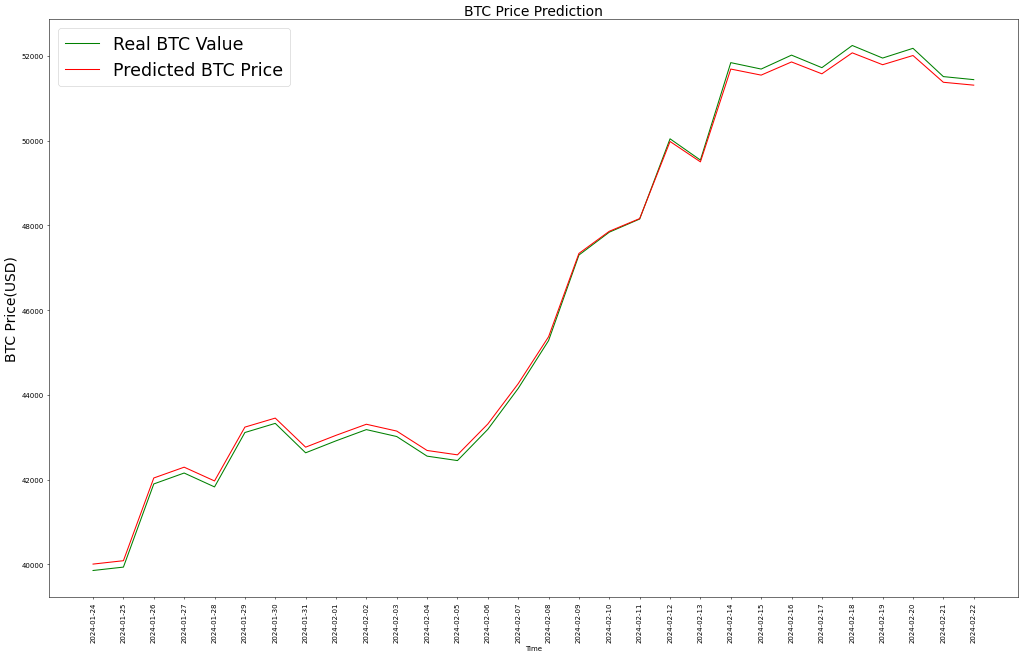

In [17]:
# Visualising the results
plt.figure(figsize=(25, 15), dpi=50, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.plot(test_set, color='green', label='Real BTC Value')
plt.plot(predicted_BTC_price, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=20)
df_test = df_test.reset_index()
x = df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation='vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('BTC Price(USD)', fontsize=20)
plt.legend(loc=2, prop={'size': 25})
plt.show()